> Statistical significance is the least interesting thing about the results. You should describe the results in terms of measures of magnitude –not just, does a treatment affect people, but how much does it affect them. ~Gene V. Glass

__Note__ For this notebook I follow the discussion made in R.R.Pagano, 'Understanding the Statistics in Behaviour Sciences.' p 329

# Effect Size

__Discussion__ Hypothesis Testing Recall

__Q__: What do we answer with an hypothesis testing?

## Size of Effect: Significant vs Important 

Q: Consider the case where we analyzed the results of an social experiment with an hypothesis testing. Suppose at the end we concluded that the results are significant. What do we really mean by this?

Let's try to explain what we mean: 


__Scenerio__: Are SAT-Math scores at one college greater than the known population mean of 500?

Data are collected from a random sample of 1,200 students at that college. The population standard deviation unknown. Find a one-sample mean test and determine p_value. Then determine whether null hypothesis should be rejected ($\alpha = 0.05$).


__Your Turn__

- Write null-hypothesis

- Write alternative hypothesis (use one sided alternative hypothesis)

- Determine the significance level.

In [1]:
## use this pickled object to run the 
## hypothesis testing

import numpy as np

from scipy import stats

import pickle

with open('sample1.pickle', 'rb') as handle:
    sample = pickle.load(handle)

In [2]:
sample.mean()

508.3923958670853

In [3]:
# %load -r 1-22 supplement.py
#population mean
mu = 500

# let's find the sample mean
x_bar = sample.mean()

# know let's find the standard error
# note that we don't know the population standard deviation
# so instead we will use sample standard deviation as an estimator

s = sample.std(ddof = 1)/np.sqrt(len(sample))

# know we will find a t-score by dividing the difference in means
# with standard error

t = (x_bar - mu)/s

# note that we know that t-score should lie on a t-distribution with
# degrees of freedom len(sample) - 1 as the parameter.
# let's use t method from scipy.stats

## For the details of methods of stats module
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
p_value = stats.t.sf(t, df = len(sample) - 1)

p_value

0.0019170045698055093

Compare the results with the ones from stats.ttest!

In [4]:
stats.ttest_1samp(sample, popmean= 500)

Ttest_1sampResult(statistic=2.8971592990279116, pvalue=0.003834009139611028)

In [5]:
print("""t-statistics: %.3f
p_value is %.3f"""%(t, p_value))

t-statistics: 2.897
p_value is 0.002


## Cohen's D for measuring effect size

It looks like there is a statistically significant difference in the exam scores between our sample and the population. Now question is this difference important?

-  Cohen(1988) gave a very simple method for determining the magnitude of the importance.

__Case 1:__ When we know the population std!

$$ d = \frac{|\bar{x} - \mu |}{\sigma} $$

- $\bar{x}$ sample mean
- $\mu$ population mean
- $\sigma$ population standard deviation
- $|\cdot|$ absolute value

!! Wait a minute is this the same with z-score?

__Case 2:__ When the population mean is not available!

$$ d = \frac{|\bar{x} - \mu |}{s} $$


- $\bar{x}$ sample mean
- $\mu$ population mean
- $s$ sample standard deviation


<table>
  <tr>
    <th>Header value of $d$</th>
    <th>Header interpretation of d</th>
  </tr>
  <tr>
    <td>0.0 - 0.20</td>
    <td>small effect</td>
  </tr>
  <tr>
    <td>0.20 - 0.79</td>
    <td> medium effect</td>
  </tr>
    <tr>
    <td>$\geq$ 0.80</td>
    <td> large effect</td>
  </tr>
</table>


__Your turn__ Find the Cohen's d score for the following problem.

In [6]:
d = (sample.mean() - 500)/sample.std(ddof =1)
print(d)

0.08363378505894961


## Effect size for two independent samples


<img src="img/two_sample_ttest.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />


<img src="img/pooled_std.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />
    
- Note that this version of the t-test assumes that the population standard deviations for the samples $\sigma_{1}$ and $\sigma_{2}$ are the same.

- Unfortunately this is not very realistic assumption most of the time. In that sense, it is suggested to use Welch's test instead of two sample t-test.




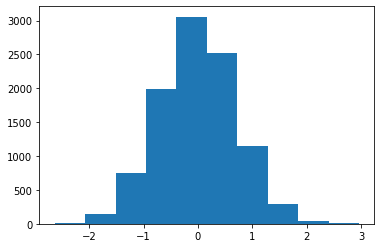

In [7]:

import matplotlib.pyplot as plt
%matplotlib inline


## Note that if samples would come from the populations with 
## same mean then the differences of the samples should normally
## distribute around 0

## here both mean and standard deviations of the 
## populations are the same


l =[]
for i in range(10000):
    s1 = np.random.normal(loc = 100, scale = 5, size = 100)

    s2 = np.random.normal(loc = 100, scale = 5, size = 100)

    l.append(s1.mean() - s2.mean())
    
plt.hist(l)
plt.show()

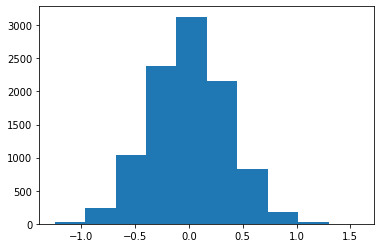

In [8]:
## even if the population variances are different
## if the population means are equal then
## we can expect that the differences of the sample means 
## will have normal shape around zero

l =[]
for i in range(10000):
    s1 = np.random.normal(loc = 100, scale = 10, size = 1000)

    s2 = np.random.normal(loc = 100, scale = 5, size = 1000)

    l.append(s1.mean() - s2.mean())

plt.hist(l)
plt.show()

In [9]:
## Now let's work with the following samples

sample1 = np.random.normal(loc = 100, scale = 10, size= 100)

sample2 = np.random.normal(loc = 110, scale = 10, size  = 60)

## note that we already know that the means are different. 
## In this case, please note that we can use two sample t-test

We can implement the formula step by step:

In [10]:
#%load -r 25-46 supplement.py

Or we can use stats.ttest_ind:

In [11]:
## Notice that we get the same result by 
## scipy.stats.ttest_ind

stats.ttest_ind(sample1, sample2, equal_var= True)

Ttest_indResult(statistic=-5.905016790910986, pvalue=2.0889752213162625e-08)

If we are not sure whether population variances are the same than we should use Welch's test.

- To apply Welch's test: scipy.stats.ttest_ind has a parameter 'equal_var' when we set it equal to False.

In [12]:
##stats.ttest_ind(sample1,sample2, equal_var=False)

Now let's discuss whether this difference is important or not.


For some tests there are commonly used measures of effect size. For example, when comparing the difference in two means we often compute Cohen's d which is the difference between the two observed sample means in standard deviation units. 

$$ \begin{gather}
 d = \frac{|\bar{x}_{1} - \bar{x}_{2}|
 }{s_{W}}
\text{where} \qquad s_{W} = \sqrt{\frac{(n_{1}-1)s_{1}^{2} + (n_{2}-1)s_{2}^{2} }{n_{1} + n_{2} - 2}}
\end{gather}$$

__Your Turn!__

Find Cohen's d for sample1 and sample2


In [13]:
# %load -r 49-61 supplement.py

__note:__ For this part of this notebook I followed "Statistics for Business and Economics" ch:9.7-9.8.

# Power of an Hypothesis Testing

- Recall $\alpha$ is the probability of making Type-I error when the null hypothesis is true.

- What about the the probability of making Type - II errors?

 - (We will call this probability as $\beta$.)
 
- Power of a statistical test measures an experiment's ability to reject a null-hypothesis when $H_{a}$ is true.
 
 Mathematically, the __power__ of an experiment is defined as the probability (1- $\beta$) that the results of an experiment will allow rejection of the null hypothesis if the independent variable has a real effect.



## Power calculations


A quality control manager must decide to accept a shipment of batteries from a supplier or to return the shipment because of poor quality. Assume that design specifications require batteries from the supplier to have a mean useful life of at least 120 hours. To evaluate the quality of an in- coming shipment, a sample of 36 batteries will be selected and tested. On the basis of the sample, a decision must be made to accept the shipment of batteries or to return it to the supplier because of poor quality.


__Your Turn__

- Write a null-hypothesis

- Write alternative hypothesis (use one sided test)

- Set the significance level

- Assume that the population standard deviation is known and equals to 12 (ie. $\sigma =12$)

- Use z-test to find critical number hours to decline shipping. 


In [14]:
# %load -r 63-64 supplement.py

Now we can compute $\beta$. To compute the probability of making Type II error we must select a value less than 120 hours.

- Suppose the true value was 112.

Finding the z-score:

$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}} = \frac{116.71 - 112}{12/\sqrt{36}} = 2.36 $$

In [15]:
beta = stats.norm.sf(2.36)

<img src="img/beta.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />

__Your Turn__

- Find $\beta$ when the true mean was 115

In [16]:
## Your work is here

<img src="img/power_curve_table.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />

<img src="img/power_curve.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />

## Determining the Sample Size for a Hypothesis Test About a Population Mean


<img src="img/power_sample_size.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />
    
    
    
note that we can show that the sample size can be given as:

$$ \sqrt{n} = \frac{z_{\alpha} + z_{\beta}}{\mu - \mu_{a}}\sigma$$

<img src="img/sample_size.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />

## Sample size, $\alpha$ and Power


- Increasing sample size --> decreases the standard error --> power increases

- Increasing $\alpha$ --> increases power: $\alpha:$ 

        Probability of making Type-I error also it defines the rejection region. So the larger the rejection region it is more likely that we will reject the null hypothesis. Therefore:

- As effect size increases power increases.


# Resources

- Null Hypothesis Significance Testing: A Review of an Old and Continuing Controversy - RS Nickerson

- [Penn State Statistics Courses](https://newonlinecourses.science.psu.edu/stat200/lesson/6/6.4)

- [Statistics For Business and Economics - 9.6](https://www.amazon.com/Statistics-Business-Economics-Book-Only/dp/0324783256)

- [G. Privitera, Statistics for Behavioral Sciences - ch-8](https://www.amazon.com/Statistics-Behavioral-Sciences-Gregory-Privitera/dp/1506386253)

- [An interactive tool for the relation between effect size $\alpha$ and power](https://rpsychologist.com/d3/NHST/)

- [Effect Sizes](https://www.statisticshowto.datasciencecentral.com/effect-size/)